In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [42]:
with open('../neuron_logs/output_20190507-213741') as f:
    results = json.load(f)

In [43]:
results = dict([(int(it), np.array(nda)) for it, nda in list(results.items())])

In [115]:
np.sum(results[5000]==0)

1710

In [120]:
results[5000].shape

(1, 4, 50, 20)

In [142]:
results[0][0,2,2,13]

0.017136577516794205

In [155]:
def select_neuron(data_dict, loc, img):
    activations = []
    for it in sorted(list(data_dict.keys())):
        #print(loc)
        # activations += list(data_dict[it][0,loc[0],loc[1]])
        activations += [data_dict[it][0,loc[0],img,loc[1]]]
        #print(it)
        #print(activations[-1])
        #print(data_dict[it][0,2,2,13])
    return(activations)

In [107]:

#example_activations = [x for x in example_activations if x != 0]

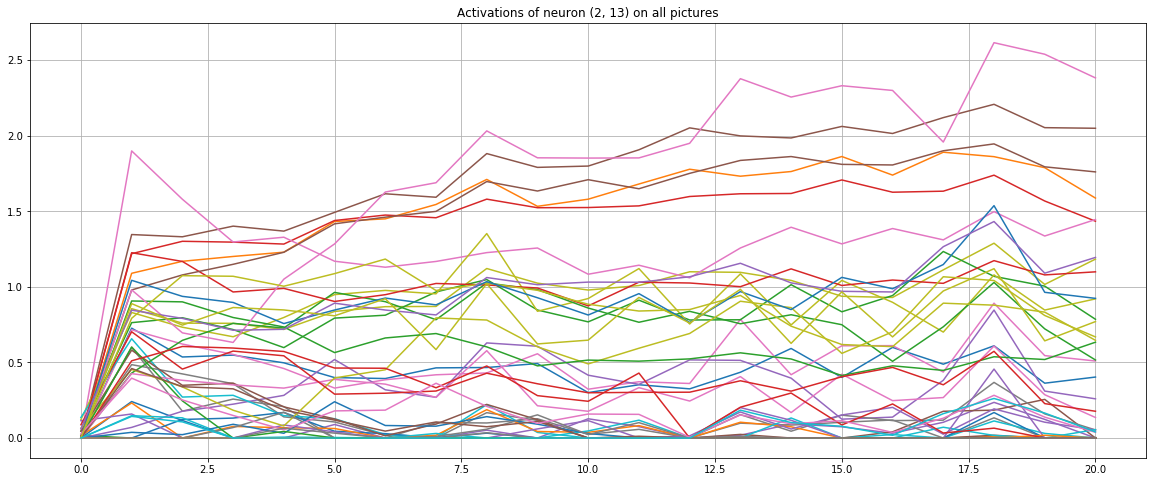

In [178]:
plt.figure(figsize=(20,8), facecolor='w')

for i in range(results[0].shape[2]): # iterating on images
    loc = (2,13)
    example_activations = select_neuron(results, loc, i)
    plt.plot(range(len(example_activations)), example_activations, '-')
    
plt.title('Activations of neuron {} on all pictures'.format(loc))
plt.grid()

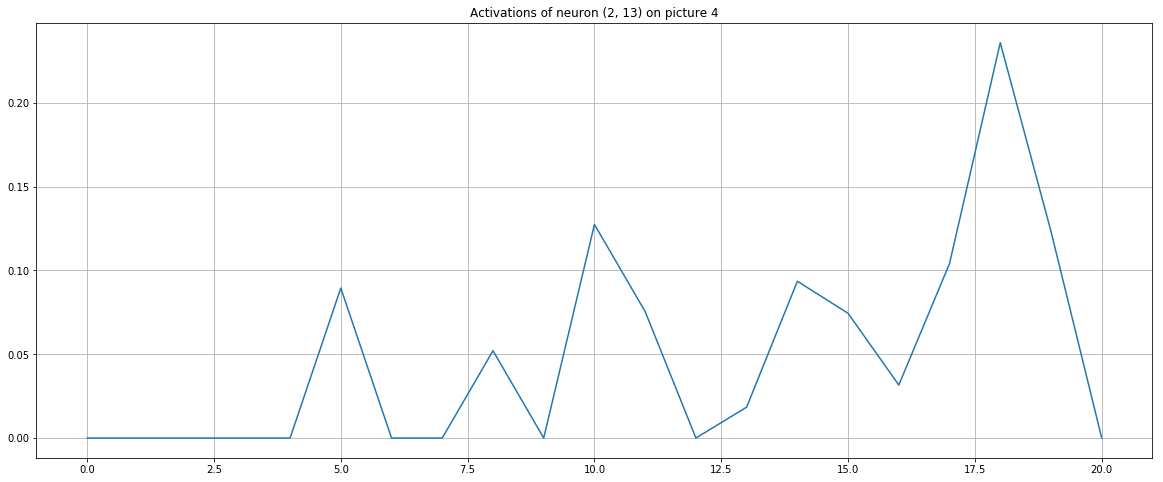

In [176]:
plt.figure(figsize=(20,8), facecolor='w')
img = 4
plt.plot(range(len(example_activations)), example_activations, '-')    
loc = (2,13)
example_activations = select_neuron(results, loc, img)
plt.title('Activations of neuron {} on picture {}'.format(loc, img))
plt.grid()

In [ ]:
[(it, np.sum(nda)) for it, nda in results.values()]

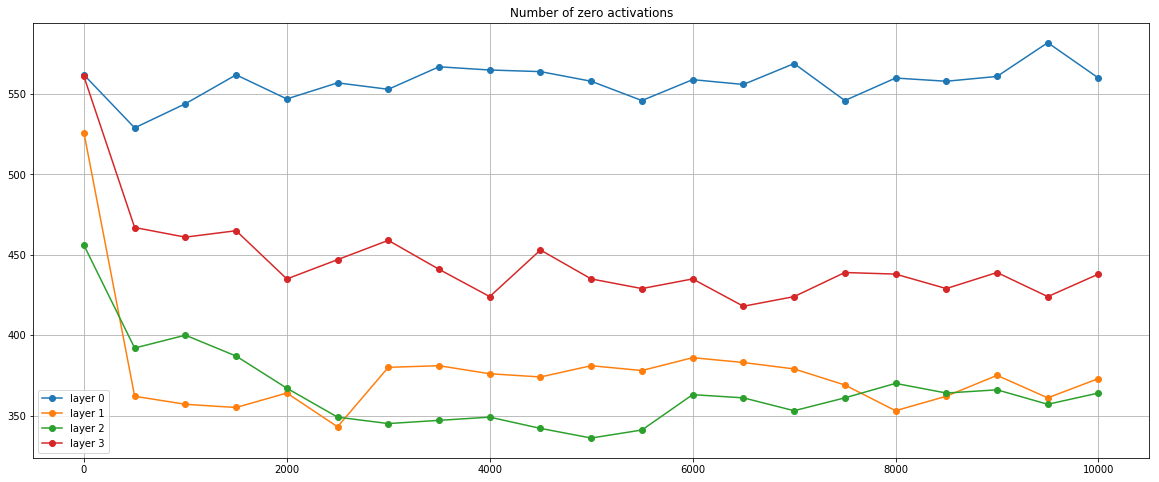

In [123]:
plt.figure(figsize=(20,8), facecolor='w')
for i_layer in range(results[0].shape[1]):
    iters, zeros = zip(*sorted([(it, np.sum(nda[0][i_layer]==0)) for it, nda in results.items()], key=lambda x: x[0]))
    plt.plot(iters, zeros, 'o-', label='layer {}'.format(i_layer))

plt.title('Number of zero activations'.format(loc))
plt.legend()
plt.grid()